In [ ]:
import pandas as pd

# Load your dataset
file_path = "/kaggle/input/object-detection-dataset/Images Data"   # change this to your file path
df = pd.read_csv(file_path)

# Filter rows with only the required classes
filtered_df = df[df["Name"].isin(["cat", "boat", "tvmonitor"])]

# Save to a new CSV file
output_path = "filtered_classes.csv"
filtered_df.to_csv(output_path, index=False)

print("Filtered dataset saved as:", output_path)
print("Counts per class:\n", filtered_df["Name"].value_counts())


Classes found: ['boat' 'cat' 'tvmonitor']
Data shapes: (31, 224, 224, 3) (31, 4) (31, 3)


Model: "functional_5"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_5       │ (None, 224, 224,  │          0 │ -                 │
│ (InputLayer)        │ 3)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_15 (Conv2D)  │ (None, 222, 222,  │        896 │ input_layer_5[0]… │
│                     │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_15    │ (None, 111, 111,  │          0 │ conv2d_15[0][0]   │
│ (MaxPooling2D)      │ 32)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_16 (Conv2D)  │ (None, 109, 109,  │     18,496 │ max_pooling2d_15… │
│                     │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_16    │ (None, 54, 54,    │          0 │ conv2d_16[0][0]   │
│ (MaxPooling2D)      │ 64)               │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ conv2d_17 (Conv2D)  │ (None, 52, 52,    │     73,856 │ max_pooling2d_16… │
│                     │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ max_pooling2d_17    │ (None, 26, 26,    │          0 │ conv2d_17[0][0]   │
│ (MaxPooling2D)      │ 128)              │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ flatten_5 (Flatten) │ (None, 86528)     │          0 │ max_pooling2d_17… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 256)       │ 22,151,424 │ flatten_5[0][0]   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ class_output        │ (None, 3)         │        771 │ dense_5[0][0]     │
│ (Dense)             │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ bbox_output (Dense) │ (None, 4)         │      1,028 │ dense_5[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 22,246,471 (84.86 MB)

 Trainable params: 22,246,471 (84.86 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - bbox_output_loss: 17396.2363 - bbox_output_mae: 98.3198 - bbox_output_mse: 18176.7617 - class_output_accuracy: 0.3958 - class_output_loss: 1.3139 - loss: 18177.9980 - val_bbox_output_loss: 7696.3921 - val_bbox_output_mae: 71.3186 - val_bbox_output_mse: 7696.3916 - val_class_output_accuracy: 0.2857 - val_class_output_loss: 2.1088 - val_loss: 7698.5010
Epoch 2/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 89ms/step - bbox_output_loss: 9342.0605 - bbox_output_mae: 74.8942 - bbox_output_mse: 9873.4678 - class_output_accuracy: 0.2569 - class_output_loss: 2.6746 - loss: 9876.1094 - val_bbox_output_loss: 4741.9092 - val_bbox_output_mae: 61.0379 - val_bbox_output_mse: 4741.9092 - val_class_output_accuracy: 0.4286 - val_class_output_loss: 6.4447 - val_loss: 4748.3540
Epoch 3/40
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 88ms/step - bbox_output_loss: 5715.0889 - bbox_output_mae: 61.0018 - bbox_output_mse: 6211.9766 - class_output_accuracy: 0.3125 - class_output_loss: 8.5961 - 

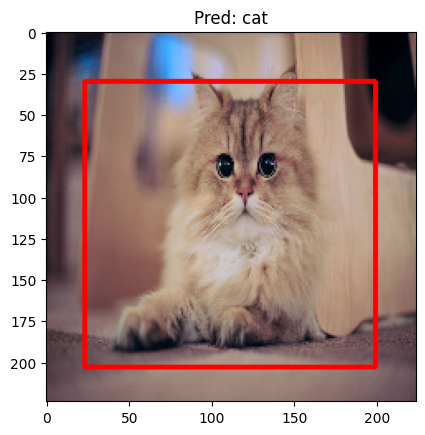

In [6]:
import os
import pandas as pd
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import tensorflow as tf
from tensorflow.keras import layers, models, Input
from tensorflow.keras.utils import to_categorical

# ================================
# 1. Load the annotations
# ================================
ANNOTATIONS_FILE = "/kaggle/input/filtered/filtered_classes (1).csv"   # update if filename differs
IMAGES_DIR = "/kaggle/input/object-detection-dataset/Images"                  # folder where images are stored

df = pd.read_csv(ANNOTATIONS_FILE)

# Encode class labels
label_encoder = LabelEncoder()
df["label_id"] = label_encoder.fit_transform(df["Name"])
num_classes = len(label_encoder.classes_)

print("Classes found:", label_encoder.classes_)

# ================================
# 2. Preprocess data
# ================================
IMG_SIZE = 224

def load_image_and_labels(row):
    # Load image
    img_path = os.path.join(IMAGES_DIR, row["Filename"])
    image = cv2.imread(img_path)
    if image is None:
        raise ValueError(f"Image not found: {img_path}")
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    image = cv2.resize(image, (IMG_SIZE, IMG_SIZE))

    # Normalize bounding box coordinates relative to image size
    x_scale = IMG_SIZE / row["Width"]
    y_scale = IMG_SIZE / row["Height"]

    xmin = int(row["xmin"] * x_scale)
    xmax = int(row["xmax"] * x_scale)
    ymin = int(row["ymin"] * y_scale)
    ymax = int(row["ymax"] * y_scale)

    bbox = np.array([xmin, ymin, xmax, ymax], dtype=np.float32)

    return image, bbox, row["label_id"]

# Load dataset into arrays
images, bboxes, labels = [], [], []
for idx, row in df.iterrows():
    try:
        img, box, label = load_image_and_labels(row)
        images.append(img)
        bboxes.append(box)
        labels.append(label)
    except Exception as e:
        print("Skipping:", e)

images = np.array(images, dtype="float32") / 255.0
bboxes = np.array(bboxes, dtype="float32")
labels = to_categorical(labels, num_classes=num_classes)

print("Data shapes:", images.shape, bboxes.shape, labels.shape)

# Train-test split
X_train, X_val, y_bbox_train, y_bbox_val, y_class_train, y_class_val = train_test_split(
    images, bboxes, labels, test_size=0.2, random_state=42
)

# ================================
# 3. Build CNN Model (dual output)
# ================================
input_layer = Input(shape=(IMG_SIZE, IMG_SIZE, 3))

base = layers.Conv2D(32, (3,3), activation="relu")(input_layer)
base = layers.MaxPooling2D((2,2))(base)
base = layers.Conv2D(64, (3,3), activation="relu")(base)
base = layers.MaxPooling2D((2,2))(base)
base = layers.Conv2D(128, (3,3), activation="relu")(base)
base = layers.MaxPooling2D((2,2))(base)
base = layers.Flatten()(base)
base = layers.Dense(256, activation="relu")(base)

# Classification head
class_output = layers.Dense(num_classes, activation="softmax", name="class_output")(base)

# Regression head (bounding box)
bbox_output = layers.Dense(4, activation="linear", name="bbox_output")(base)

# Final model
model = models.Model(inputs=input_layer, outputs=[class_output, bbox_output])

model.compile(
    optimizer="adam",
    loss={"class_output": "categorical_crossentropy", "bbox_output": "mse"},
    metrics={"class_output": "accuracy", "bbox_output": ["mse", "mae"]}
)

model.summary()

# ================================
# 4. Train the model
# ================================
history = model.fit(
    X_train, {"class_output": y_class_train, "bbox_output": y_bbox_train},
    validation_data=(X_val, {"class_output": y_class_val, "bbox_output": y_bbox_val}),
    epochs=40,
    batch_size=16,
    verbose=1
)

# ================================
# 5. Evaluate metrics
# ================================
print("\nEvaluating on validation set...")
results = model.evaluate(
    X_val, {"class_output": y_class_val, "bbox_output": y_bbox_val}, verbose=1
)
print("Evaluation Results:", results)

# Predictions for validation set
y_pred_class, y_pred_bbox = model.predict(X_val)

# Get true and predicted labels
y_true_class = np.argmax(y_class_val, axis=1)
y_pred_class_ids = np.argmax(y_pred_class, axis=1)

# Get only the classes that actually appear in y_true
unique_labels = np.unique(y_true_class)
class_names = label_encoder.inverse_transform(unique_labels)

print("\nClassification Report:")
print(
    classification_report(
        y_true_class, y_pred_class_ids,
        labels=unique_labels, target_names=class_names
    )
)
# ================================
# 6. Test on a random image
# ================================
import random

idx = random.randint(0, len(X_val)-1)
test_img = np.expand_dims(X_val[idx], axis=0)

pred_class, pred_bbox = model.predict(test_img)

pred_class_id = np.argmax(pred_class[0])
pred_class_name = label_encoder.inverse_transform([pred_class_id])[0]
pred_bbox = pred_bbox[0].astype(int)

# Draw predicted bounding box
img = (X_val[idx] * 255).astype("uint8")
cv2.rectangle(img, (pred_bbox[0], pred_bbox[1]), (pred_bbox[2], pred_bbox[3]), (255,0,0), 2)
plt.imshow(img)
plt.title(f"Pred: {pred_class_name}")
plt.show()
